Unified by key vs baseline

**Goal:** ...
  
This notebook is divided in two parts:
* **1. Bla**

In [1]:
%run ../../../utils/Python/setup_environment.ipy
%run ../../../utils/Python/selene_job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

# Baseline

In [2]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

In [3]:
features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

X, y = data.process(features).get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X, y)

X: (194211, 45) | y: (194211,)


,count_,freq_
False,187012,96.29%
True,7199,3.71%


In [4]:
job_baseline = Selene_Job('groupkfold_baseline', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')
job_baseline.load_data(X, y)

➞ mkdir on local computer ssh_remote_jobs/job_groupkfold_baseline


<span style="color:green">Job < groupkfold_baseline >: </span>✅ created

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_groupkfold_baseline


<span style="color:green">Job < groupkfold_baseline >: </span>✅ data loaded

In [33]:
job_baseline = Selene_Job('groupkfold_baseline', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < groupkfold_baseline >: </span>✅ job found and reloaded

In [25]:
%%writefile {job_baseline.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# set cross-validation
from sklearn.model_selection import RepeatedStratifiedKFold
cv_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# create model and get the metrics
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      GradientBoostingClassifier(random_state=42, loss='deviance', max_depth=6, n_estimators=500))
metrics = Metrics(model, X, y, cv_strategy, n_jobs=25)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ssh_remote_jobs/job_groupkfold_baseline/script.ipy


In [26]:
job_baseline.run(n_jobs=20, short_job=True)

➞ scp ssh_remote_jobs/job_groupkfold_baseline to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_baseline
script.ipy                                    100%  863    27.5KB/s   00:00    
X.pkl                                         100%   44MB  12.0MB/s   00:03    
y.pkl                                         100% 3225KB  10.9MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_baseline
Job <30436145> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J groupkfold_baseline -We 59 -n 20 -R "span[ptile=5]" "ipython script.ipy"


<span style="color:green">Job < groupkfold_baseline >: </span>✅ submitted<br>

In [34]:
job_baseline.get_results()

<span style="color:green">Job < groupkfold_baseline >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_baseline to ssh_remote_jobs/job_groupkfold_baseline
metrics.pkl                                   100%   64MB   8.1MB/s   00:07    
job_output.txt                                100% 1424    45.3KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.588 ± 0.012
▴ Mean roc_auc          : 0.896 ± 0.004
▴ Mean precision        : 0.196 ± 0.004
▴ Mean recall           : 0.768 ± 0.012
▴ Mean f1               : 0.313 ± 0.005
▴ Mean accuracy         : 0.875 ± 0.004


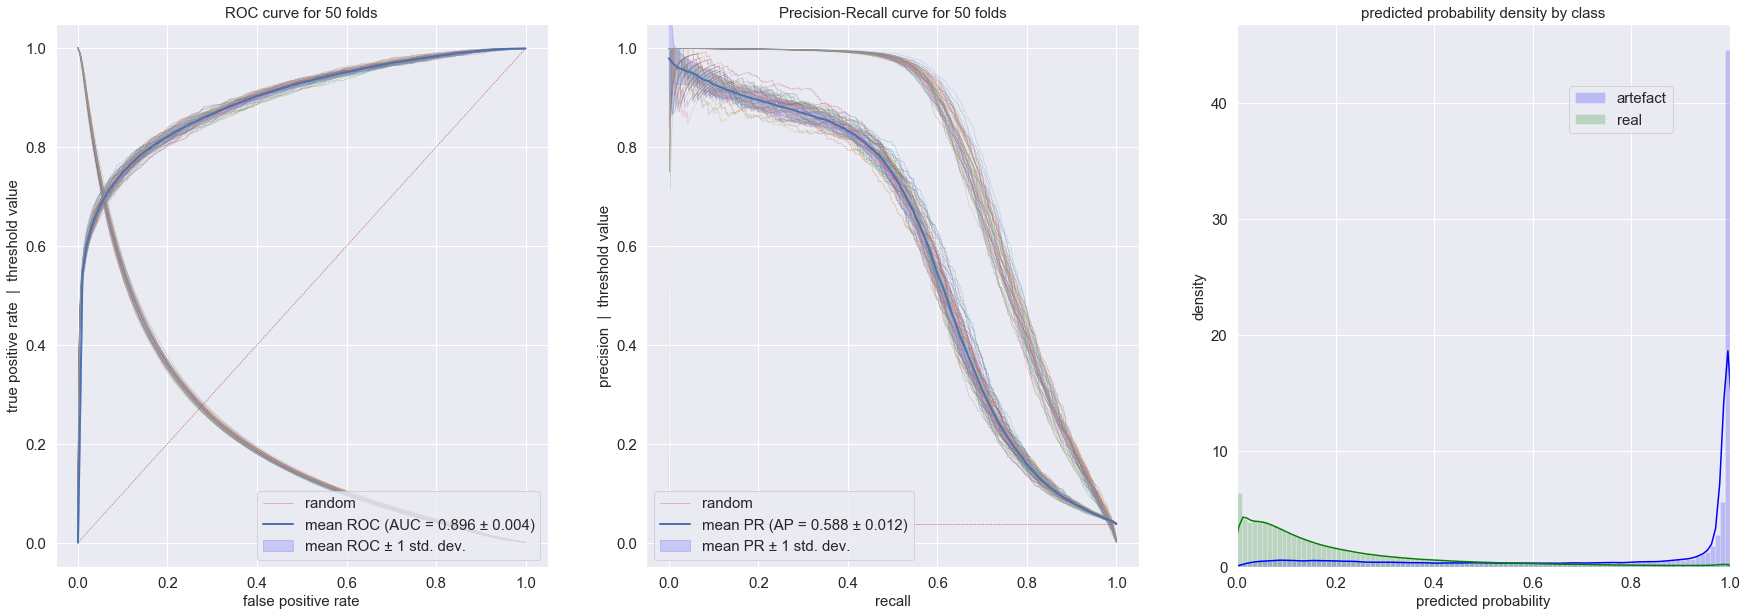

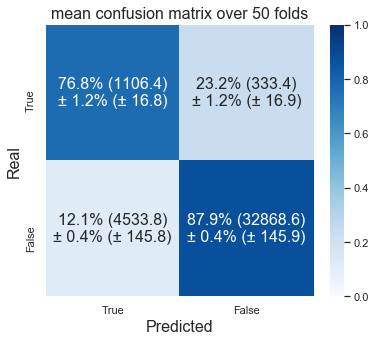

In [35]:
job_baseline.metrics.print_mean()
job_baseline.metrics.plot_threshold_decision_curves(show_folds_legend=False)
job_baseline.metrics.plot_mean_confusion_matrix()

# GroupKFold with group = `mut_key`

In [17]:
group_mut_key = data.get_original_impact()['mut_key']

In [18]:
job_mut_key = Selene_Job('groupkfold_mut_key', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')
job_mut_key.load_data(X, y, groups=group_mut_key)

➞ mkdir on local computer ssh_remote_jobs/job_groupkfold_mut_key


<span style="color:green">Job < groupkfold_mut_key >: </span>✅ created

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_groupkfold_mut_key
➞ save groups.pkl in ssh_remote_jobs/job_groupkfold_mut_key


<span style="color:green">Job < groupkfold_mut_key >: </span>✅ data loaded

In [36]:
job_mut_key = Selene_Job('groupkfold_mut_key', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < groupkfold_mut_key >: </span>✅ job found and reloaded

In [28]:
%%writefile {job_mut_key.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')
groups = pd.read_pickle('groups.pkl')

# set cross-validation
from sklearn.model_selection import GroupKFold
cv_strategy = GroupKFold(n_splits=5)

# create model and get the metrics
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      GradientBoostingClassifier(random_state=42, loss='deviance', max_depth=6, n_estimators=500))
metrics = Metrics(model, X, y, cv_strategy, groups=groups, n_jobs=25)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ssh_remote_jobs/job_groupkfold_mut_key/script.ipy


In [29]:
job_mut_key.run(n_jobs=20, short_job=True)

➞ scp ssh_remote_jobs/job_groupkfold_mut_key to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_mut_key
groups.pkl                                    100% 5863KB  12.6MB/s   00:00    
script.ipy                                    100%  859    11.8KB/s   00:00    
X.pkl                                         100%   44MB  14.8MB/s   00:03    
y.pkl                                         100% 3225KB  13.7MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_mut_key
Job <30436147> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J groupkfold_mut_key -We 59 -n 20 -R "span[ptile=5]" "ipython script.ipy"


<span style="color:green">Job < groupkfold_mut_key >: </span>✅ submitted<br>

In [37]:
job_mut_key.get_results()

<span style="color:green">Job < groupkfold_mut_key >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_mut_key to ssh_remote_jobs/job_groupkfold_mut_key
metrics.pkl                                   100% 6529KB   7.7MB/s   00:00    
job_output.txt                                100% 1417     8.3KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.579 ± 0.022
▴ Mean roc_auc          : 0.890 ± 0.004
▴ Mean precision        : 0.192 ± 0.006
▴ Mean recall           : 0.757 ± 0.013
▴ Mean f1               : 0.307 ± 0.008
▴ Mean accuracy         : 0.873 ± 0.003


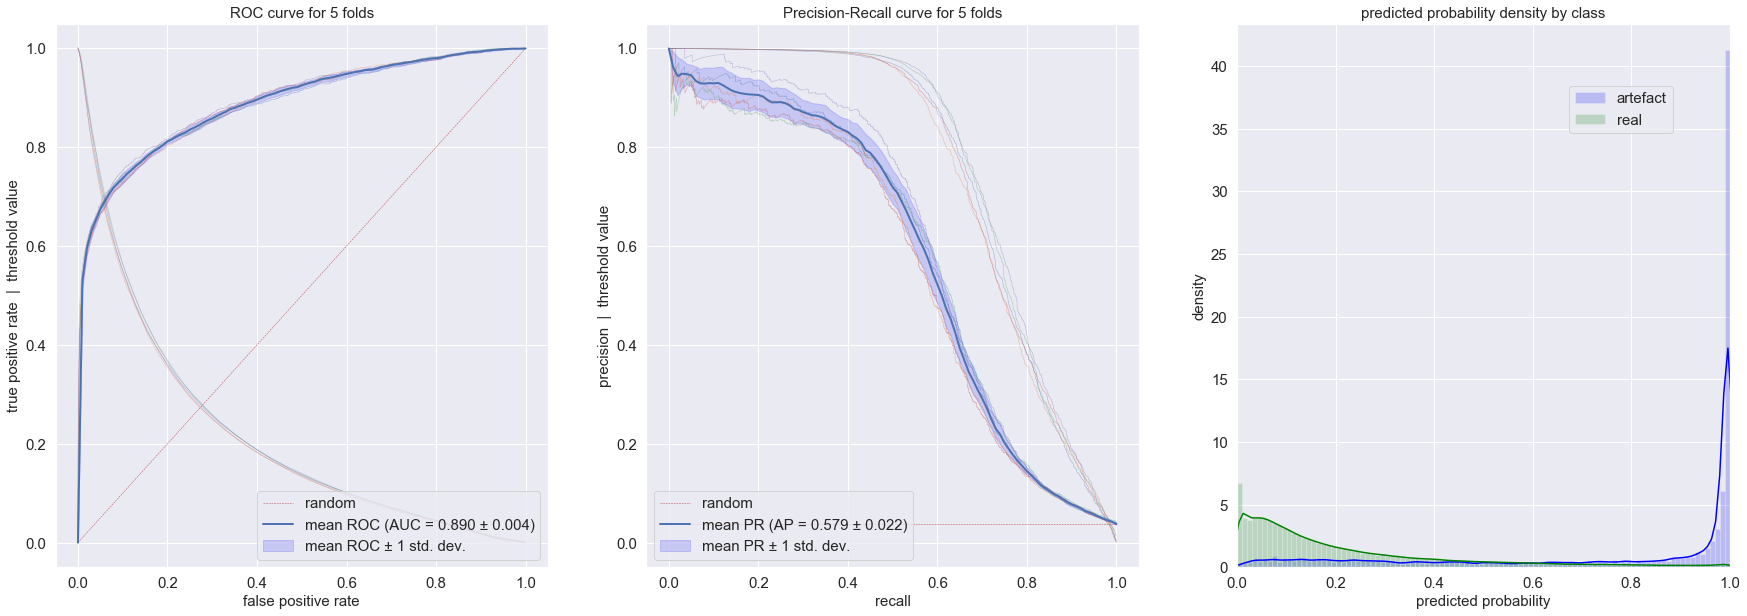

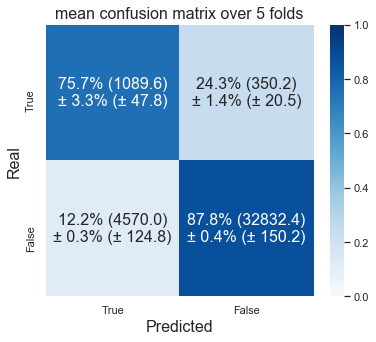

In [38]:
job_mut_key.metrics.print_mean()
job_mut_key.metrics.plot_threshold_decision_curves(show_folds_legend=False)
job_mut_key.metrics.plot_mean_confusion_matrix()

# GroupKFold with group = `patient_key`

In [10]:
group_patient_key = data.get_original_impact()['patient_key']

In [11]:
job_patient_key = Selene_Job('groupkfold_patient_key', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')
job_patient_key.load_data(X, y, groups=group_patient_key)

➞ mkdir on local computer ssh_remote_jobs/job_groupkfold_patient_key


<span style="color:green">Job < groupkfold_patient_key >: </span>✅ created

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_groupkfold_patient_key
➞ save groups.pkl in ssh_remote_jobs/job_groupkfold_patient_key


<span style="color:green">Job < groupkfold_patient_key >: </span>✅ data loaded

In [39]:
job_patient_key = Selene_Job('groupkfold_patient_key', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < groupkfold_patient_key >: </span>✅ job found and reloaded

In [31]:
%%writefile {job_patient_key.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')
groups = pd.read_pickle('groups.pkl')

# set cross-validation
from sklearn.model_selection import GroupKFold
cv_strategy = GroupKFold(n_splits=5)

# create model and get the metrics
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      GradientBoostingClassifier(random_state=42, loss='deviance', max_depth=6, n_estimators=500))
metrics = Metrics(model, X, y, cv_strategy, groups=groups, n_jobs=25)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ssh_remote_jobs/job_groupkfold_patient_key/script.ipy


In [32]:
job_patient_key.run(n_jobs=20, short_job=True)

➞ scp ssh_remote_jobs/job_groupkfold_patient_key to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_patient_key
groups.pkl                                    100% 4100KB   4.7MB/s   00:00    
script.ipy                                    100%  859    10.8KB/s   00:00    
X.pkl                                         100%   44MB  11.3MB/s   00:03    
y.pkl                                         100% 3225KB  10.6MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_patient_key
Job <30436148> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J groupkfold_patient_key -We 59 -n 20 -R "span[ptile=5]" "ipython script.ipy"


<span style="color:green">Job < groupkfold_patient_key >: </span>✅ submitted<br>

In [40]:
job_patient_key.get_results()

<span style="color:green">Job < groupkfold_patient_key >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_groupkfold_patient_key to ssh_remote_jobs/job_groupkfold_patient_key
metrics.pkl                                   100% 6600KB   6.5MB/s   00:00    
job_output.txt                                100% 1429    57.3KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.558 ± 0.036
▴ Mean roc_auc          : 0.874 ± 0.014
▴ Mean precision        : 0.186 ± 0.007
▴ Mean recall           : 0.724 ± 0.026
▴ Mean f1               : 0.296 ± 0.010
▴ Mean accuracy         : 0.873 ± 0.004


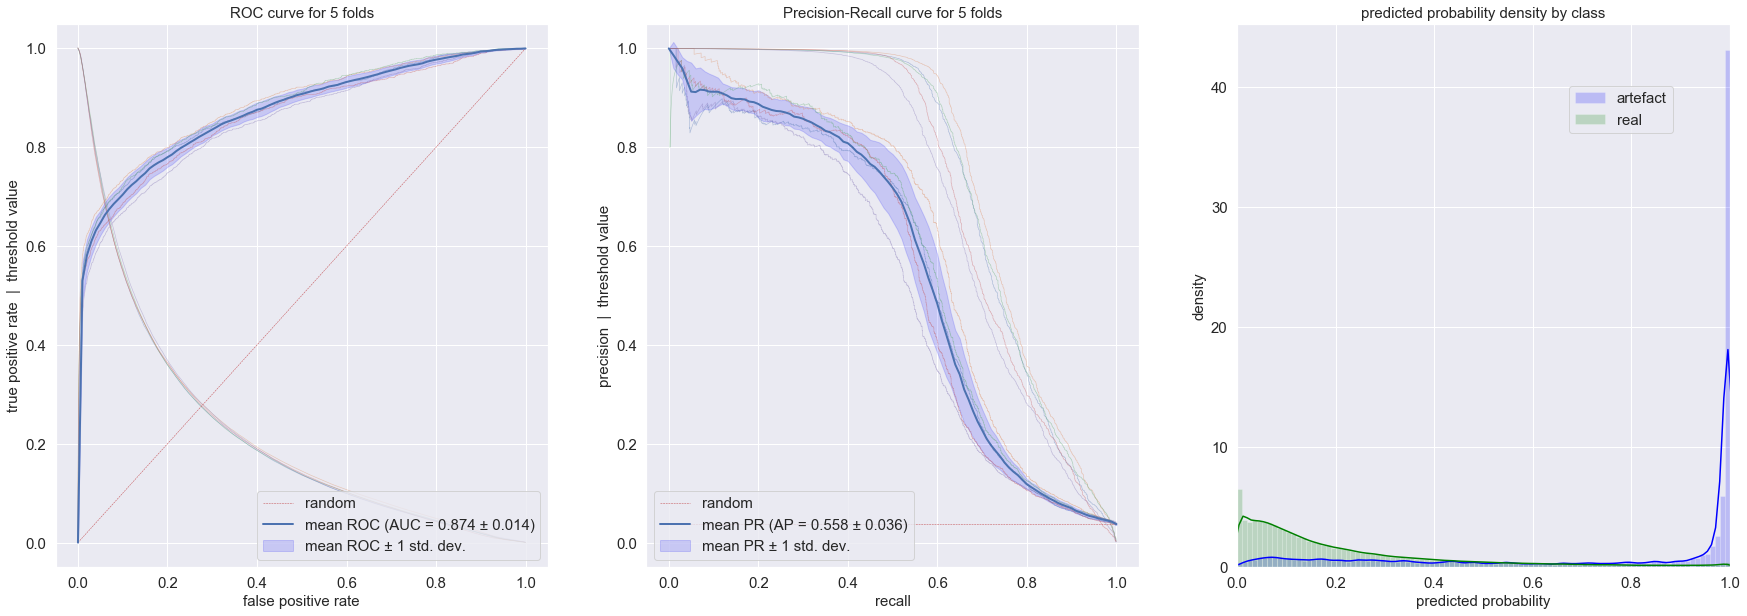

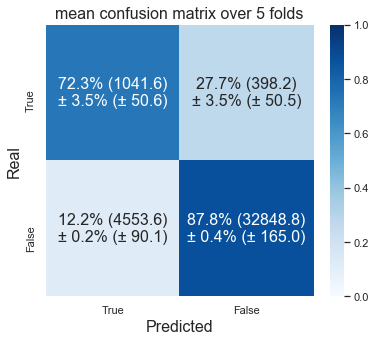

In [41]:
job_patient_key.metrics.print_mean()
job_patient_key.metrics.plot_threshold_decision_curves(show_folds_legend=False)
job_patient_key.metrics.plot_mean_confusion_matrix()

# Summary

,test_average_precision_mean,test_roc_auc_mean,test_precision_mean,test_recall_mean,test_f1_mean,test_accuracy_mean
metrics_name,,,,,,
baseline,0.588,0.896,0.196,0.768,0.313,0.875
mut_key,0.579,0.89,0.192,0.757,0.307,0.873
patient_key,0.558,0.874,0.186,0.724,0.296,0.873


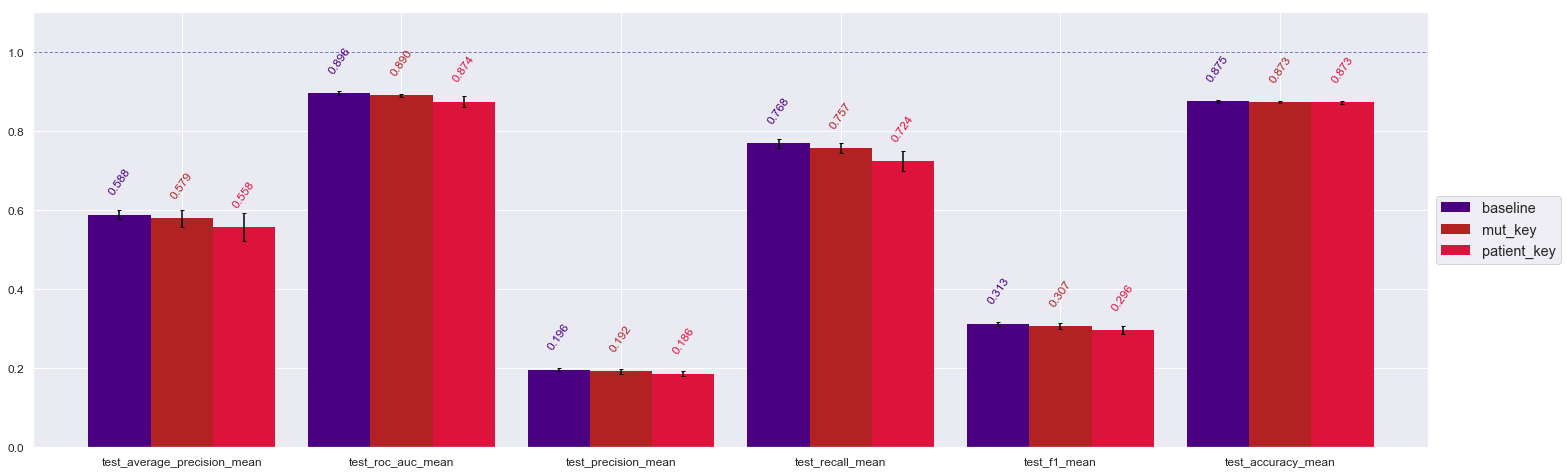

In [42]:
summary = Summary()
summary.add(job_baseline.metrics   , 'baseline'   , 'indigo')
summary.add(job_mut_key.metrics    , 'mut_key'    , 'firebrick')
summary.add(job_patient_key.metrics, 'patient_key', 'crimson')
summary.display()
summary.plot()